<a href="https://colab.research.google.com/github/AkashArya96/Movie_Reccomedation/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [67]:
data = pd.read_csv('TSLA.csv')

In [68]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [70]:
df1 = data.reset_index()['Close']

In [71]:
df1.shape

(2416,)

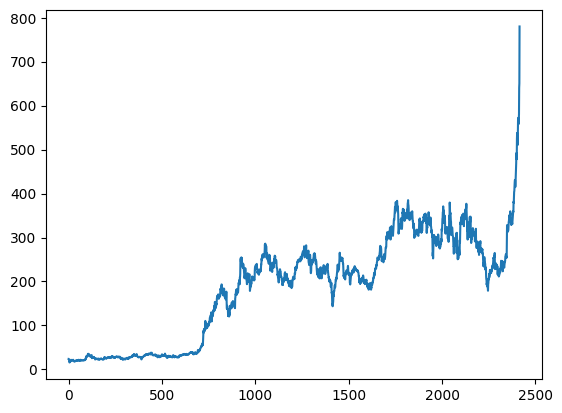

In [72]:
plt.plot(df1)

In [73]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [74]:
df1.shape

(2416, 1)

In [75]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [76]:
training_size,test_size

(1570, 846)

In [77]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0,0,1,2,3,4----99  100
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)


In [78]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [79]:
print(X_train)

[[0.01058623 0.01050772 0.00806072 ... 0.01962837 0.0181497  0.01791416]
 [0.01050772 0.00806072 0.0044491  ... 0.0181497  0.01791416 0.01843758]
 [0.00806072 0.0044491  0.00040565 ... 0.01791416 0.01843758 0.019877  ]
 ...
 [0.31135829 0.30838786 0.30346769 ... 0.23586758 0.23633866 0.24158597]
 [0.30838786 0.30346769 0.29437319 ... 0.23633866 0.24158597 0.24810258]
 [0.30346769 0.29437319 0.2957341  ... 0.24158597 0.24810258 0.24933263]]


In [80]:
print(X_test.shape),print(y_test.shape)

(745, 100)
(745,)


(None, None)

In [81]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [83]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
X_train[:100]

array([[[0.01058623],
        [0.01050772],
        [0.00806072],
        ...,
        [0.01962837],
        [0.0181497 ],
        [0.01791416]],

       [[0.01050772],
        [0.00806072],
        [0.0044491 ],
        ...,
        [0.0181497 ],
        [0.01791416],
        [0.01843758]],

       [[0.00806072],
        [0.0044491 ],
        [0.00040565],
        ...,
        [0.01791416],
        [0.01843758],
        [0.019877  ]],

       ...,

       [[0.01962837],
        [0.0181497 ],
        [0.01791416],
        ...,
        [0.01426328],
        [0.01398848],
        [0.0149699 ]],

       [[0.0181497 ],
        [0.01791416],
        [0.01843758],
        ...,
        [0.01398848],
        [0.0149699 ],
        [0.01398848]],

       [[0.01791416],
        [0.01843758],
        [0.019877  ],
        ...,
        [0.0149699 ],
        [0.01398848],
        [0.01239204]]])

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
23/23 [==============================] - 7s 315ms/step - loss: 3.1852e-04 - val_loss: 0.0019
Epoch 2/50
23/23 [==============================] - 6s 240ms/step - loss: 2.9848e-04 - val_loss: 0.0019
Epoch 3/50
23/23 [==============================] - 7s 326ms/step - loss: 2.8543e-04 - val_loss: 0.0019
Epoch 4/50
23/23 [==============================] - 6s 247ms/step - loss: 2.7210e-04 - val_loss: 0.0017
Epoch 5/50
23/23 [==============================] - 7s 324ms/step - loss: 2.5618e-04 - val_loss: 0.0017
Epoch 6/50
23/23 [==============================] - 6s 247ms/step - loss: 2.4794e-04 - val_loss: 0.0014
Epoch 7/50
23/23 [==============================] - 7s 327ms/step - loss: 2.4485e-04 - val_loss: 0.0018
Epoch 8/50
23/23 [==============================] - 6s 248ms/step - loss: 2.2800e-04 - val_loss: 0.0017
Epoch 9/50
23/23 [==============================] - 7s 301ms/step - loss: 2.0968e-04 - val_loss: 0.0019
Epoch 10/50
23/23 [==============================] - 6s 248ms/st

In [88]:
import tensorflow as tf

In [89]:
tf.__version__

'2.12.0'

In [90]:
# lETS DO THE prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict = model.predict(X_test)

24/24 [==============================] - 1s 46ms/step


In [91]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [92]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

158.44941449261165

In [93]:
math.sqrt(mean_squared_error(y_test,test_predict))

296.4037861359023

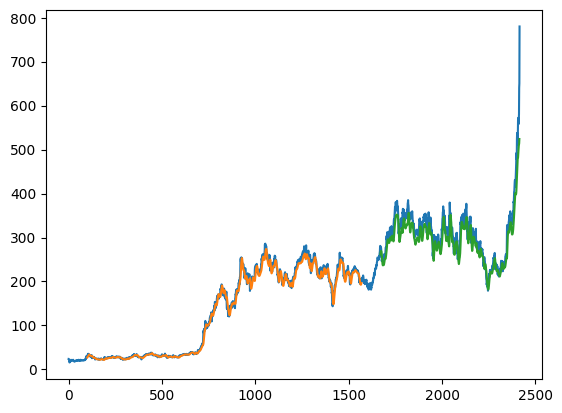

In [94]:
#  plotting
#  shift train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot= numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
len(test_data)

846

In [97]:
x_input = test_data[746:].reshape(1,-1)
x_input.shape

(1, 100)

In [98]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [99]:
temp_input

[0.3026694661083486,
 0.30105992541219573,
 0.3001831941900026,
 0.2970557419523685,
 0.2996466801884323,
 0.2979455705312745,
 0.30201518712378955,
 0.29418999607432605,
 0.29498821774404604,
 0.27140801753467675,
 0.27859198769955507,
 0.296728602460089,
 0.296165931693274,
 0.2945171355666056,
 0.2995158361685422,
 0.29747448966239204,
 0.2842580463229521,
 0.2821643457210154,
 0.2903951858152316,
 0.29344412850039253,
 0.29930646296780944,
 0.29958126799267204,
 0.303703217744046,
 0.31557182805548284,
 0.3167888183721539,
 0.3192227165663439,
 0.3221277165663439,
 0.315558769955509,
 0.31104422925935615,
 0.3137660324522376,
 0.31258831850300967,
 0.37147342711332115,
 0.4087019170374247,
 0.4081523043705836,
 0.3931169863909971,
 0.391533643025386,
 0.39141587673383926,
 0.3893090787751897,
 0.39475268385239465,
 0.3944255443601152,
 0.40667362863124834,
 0.41839833682282124,
 0.4204920374247579,
 0.43089504841664483,
 0.43722846506150226,
 0.4322297631510076,
 0.4364695184506673

In [100]:
from numpy import array
lst_output = []
n_step =100
i=0
while(i<30):

    if(len(temp_input)>100):
      x_input = np.array(temp_input[1:])
      print('{} day input {}'.format(i,x_input))
      x_input = x_input.reshape(1,-1)
      x_input = x_input.reshape((1,n_step,1))
      yhat = model.predict(x_input,verbose=0)
      print("{} day output {} ".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input = temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
    else:
      x_input = x_input.reshape((1,n_step,1))
      yhat = model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i = i+1
print(lst_output)

[0.7266406]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.68322426 0.65781209 

In [101]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)


In [102]:
import matplotlib.pyplot as plt

In [103]:
len(df1)

2416

In [104]:
df2 = df1.tolist()
df2.extend(lst_output)

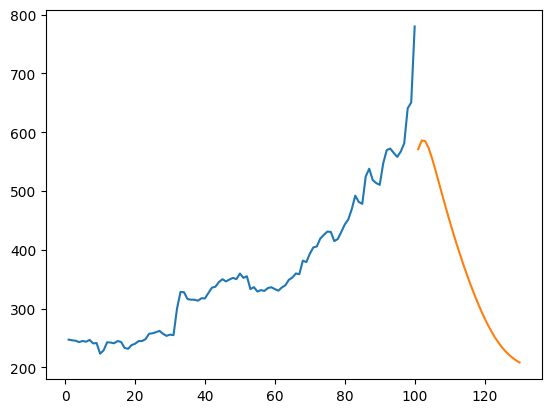

In [105]:
plt.plot(day_new,scaler.inverse_transform(df1[2316:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

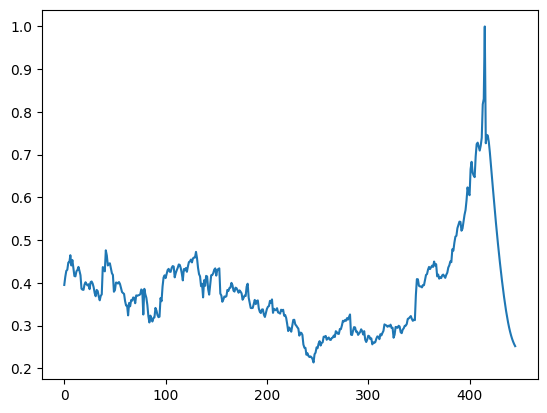

In [107]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1000:])